DGP

In [2]:
import gc
from scipy.special import logit
import numpy as np
from scipy.stats import norm

In [5]:
def DGP(n = 500, G0 = 200, p = 300, beta2 = 0):
 
    beta0 =[1,beta2,1/3,1/4,1/5,1/6,1/7,1/8,1/9,1/10,1/11,1/12,1/13,1/14,1/15,1/16,1/17,1/18,1/19,1/20]
    beta0.extend([0]*(p-20))
    beta0 = np.array(beta0)[:,None]
    
    sigma = []        #為找X先設定sigma(rho)
    for i in range(p-1):
        for j in range(p-1):
            sigma.append(0.1 ** abs(i-j))
    sigma = np.reshape(sigma,(p-1,p-1)) #toeplitz(sigma,sigma)
    
    # create the data set
    X1 = np.random.multivariate_normal(np.zeros(p-1), sigma, n)
    # create the data set followed the same distribution as X1
    X2 = np.random.multivariate_normal(np.zeros(p-1), sigma, G0)
    
    # indexed X2, [[1, cluster_1], [2, cluster_2], ..., [G0, cluster_G0]]
    X2g = np.hstack((np.arange(0,G0)[:,None],X2)) 
    
    # create a set of index
    idx = np.random.randint(0, high= G0+1, size= n )    #[0,201)
    ng = np.unique(idx, return_counts=True)[1]    # count, ng[0] = count(0), the no entry  #腦袋又卡住的話，看看sum(ng)
    G = n-ng[0]
    
    # indexed X1
    X1_idx = np.hstack((idx[:,None], X1))   # indexed = X_test[:,0]

    # combined  indexed X1 and indexed X2
    X_sub = np.array([[0]*(p-1)]*n, dtype='f')
    for i in range(0,n):
        for j in range(0,G0):
            if X1_idx[i,0] == X2g[j,0] and X2g[j,0] == 0:
                X_sub[i] = (X1_idx[i,1:])
            if X1_idx[i,0] == X2g[j,0]:    # X1d[:,0] and X2g[:,0] are index 
                X_sub[i] = (X1_idx[i,1:]+X2g[j,1:])
                
    # combined  ones and indexed X1 and indexed X2
    Xig = np.array([np.hstack(([1], X_sub[i])) for i in range(n)])
    
    
    U1 = np.random.normal(0, 1/2, n)
    U2 = np.random.normal(0, 1/2, n)
    phi = norm.ppf(q=(U1+U2), loc=0, scale=1)    #cdf of normal distribution
    Uig = np.nan_to_num(logit(phi)[:,None])
    
    Yig = np.where( (np.dot(Xig,beta0) + Uig) > 0, 1,0) #(np.dot(Xig,beta0)+Uig), 0) # 0 is broadcast

    return Xig, Uig, Yig, beta0, G, ng
    
DGP(500,200,300)


data = DGP(500,200,300)

Xig = data[0]
Uig = data[1]
Yig = data[2]
beta0 = data[3]
G = data[4]
ng = data[5]


2290

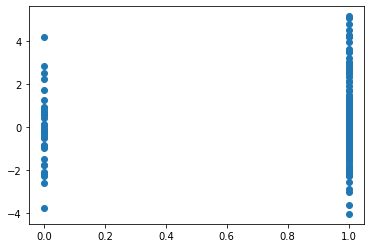

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(Yig, logit(Xig.dot(beta0)))

del data
gc.collect()